In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
import random
from math import sin, cos, sqrt, atan2, radians
from ease_grid import EASE2_grid
grid_size = 36000
egrid = EASE2_grid(grid_size)
assert egrid.shape == (406, 964)
from impacts import IMPAaCS
from impacts import distance

In [2]:
impact_boundz=20
[-impact_boundz, impact_boundz]
I = IMPAaCS(egrid, max_depth_of_impact_melt=330, 
               lon_lims = [-impact_boundz, impact_boundz], lat_lims = [-impact_boundz, impact_boundz])
new_lat=[]
new_lon=[]
for i in I.lon_subset:
    if np.abs(i)<20:
        new_lon.append(i)
for i in I.lat_subset:
    if np.abs(i)<20:
        new_lat.append(i)
I.lon_subset = new_lon
I.lat_subset = new_lat
I.n_x = len(I.lon_subset)
I.n_y = len(I.lat_subset)

cube volume 2596.6418774091976, in km^3
sample area 19350175.27045334, in km^2
our sample represents 0.038 of earth's surface area
we need to multiply our volume by 26.234 to correct for sample/earth area
multiply n_cubes by 68121.0 to get crust volume [km^3] on earth
divide by 7200000000.0 to get relative percent crust volume
the final multiplier to get relative percent volume crust is 9.461249582997852e-06


In [80]:
# ---------------------------------------------------------------------------------------------
def plot_cross_section(Impc, save_figure=False, plot_figure=False, fig_path='./', 
                       n_cross_vertical_discretizations=20, cross_lat=0, cross_time=None):

    """ 
        Function for plotting cross sections of impact states.
        Function inputs:
            save_figure=False
            plot_figure=False
            fig_path='./'
            n_cross_vertical_discretizations=20
            cross_y_lon=0
    """

    if not plot_figure and not save_figure:
        print('not plotting figure')
        return

    # This is the array that will have the state values for the cross section
    cross = np.zeros([Impc.n_x, n_cross_vertical_discretizations])
    
    # Find the closest longitude in our state space
    min_dist_from_cross=1000000000
    for i, ilat in enumerate(Impc.lat_subset):
        dist_from_cross = np.abs(cross_lat - ilat)
        if dist_from_cross < min_dist_from_cross:
            min_dist_from_cross = dist_from_cross
            plot_this_latitude = ilat
    
    for ilon, longitude in enumerate(Impc.lon_subset):
        
        grid_cell = str(round(longitude,4))+' '+str(round(plot_this_latitude,4))
        
        cross[ilon, :] = Impc.grid_cell_state[grid_cell][0:n_cross_vertical_discretizations]

    # Do the plotting
    x, y = np.meshgrid(np.linspace(-impact_boundz, impact_boundz, I.n_x), np.linspace(-n_vertical, 0, n_vertical))
    fig, ax = plt.subplots()
    c = ax.pcolormesh(x, y, np.flip(np.transpose(cross)), cmap='RdBu', vmin=45, vmax=65)
    ax.set_title(f'SiO2 at time {cross_time}')
    ax.set_xlabel('Longitude (degree)')
    ax.set_ylabel('Depth (km)')
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)

    plt.show()
    plt.close()

    return cross

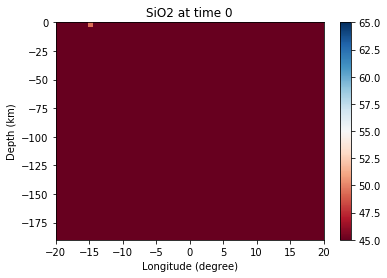

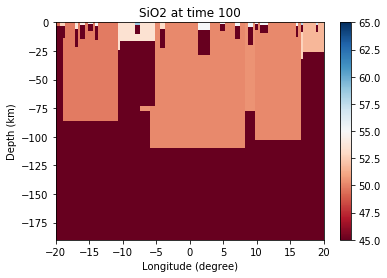

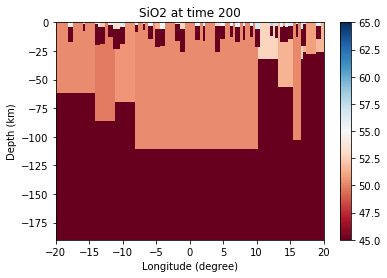

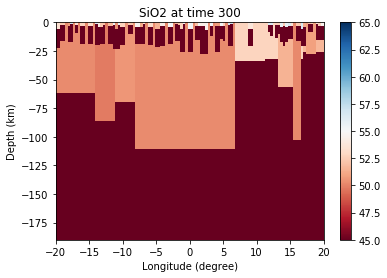

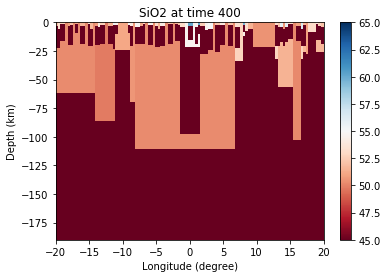

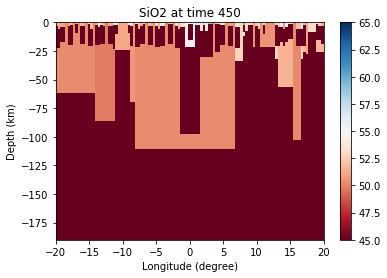

In [86]:
for t in [0,100,200, 300, 400, 450]:
    state_file = './impact_states/march2022_5/0/{}.pkl'.format(t)
    with open(state_file, 'rb') as fb:
        impact_states = pkl.load(fb)
    I.grid_cell_state = impact_states
    
    n_vertical = 190
    cross_lat=16
    cross_at_time = plot_cross_section(I, save_figure=False, plot_figure=True, fig_path='./', 
                       n_cross_vertical_discretizations=n_vertical, cross_lat=cross_lat, cross_time=t)

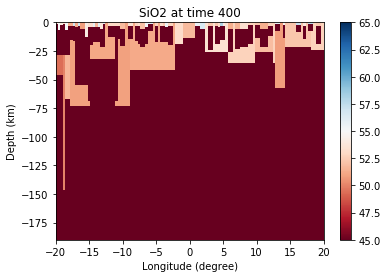

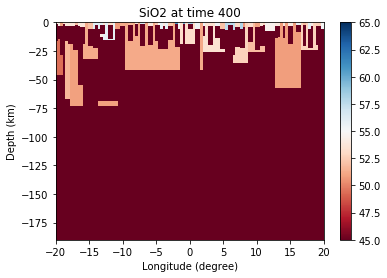

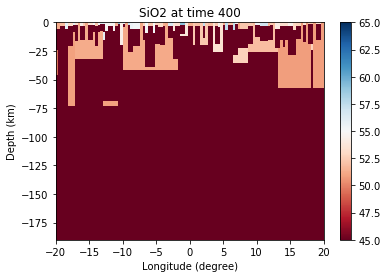

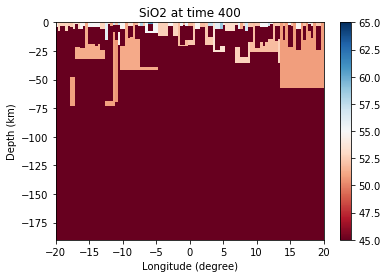

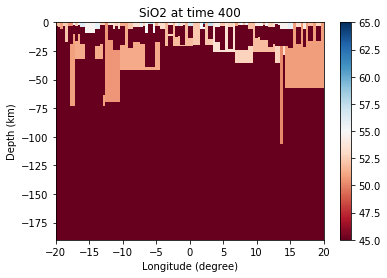

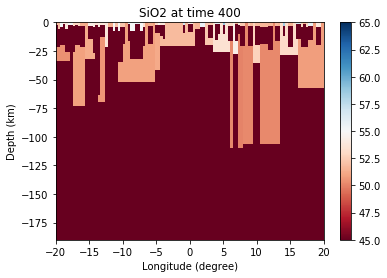

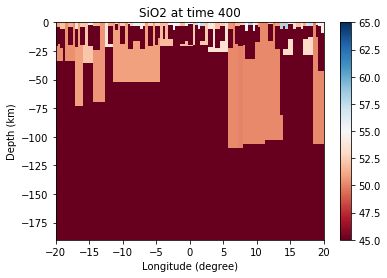

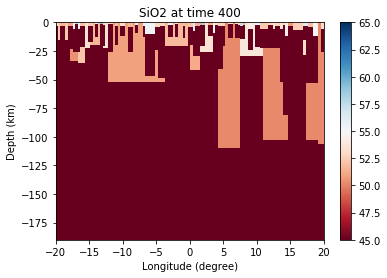

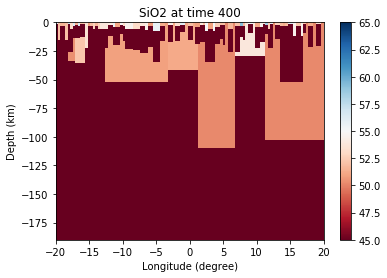

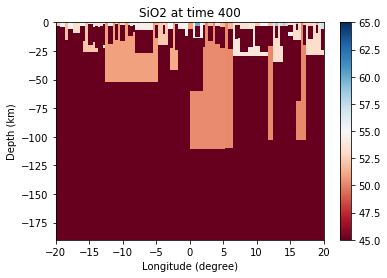

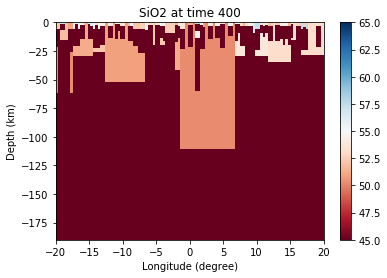

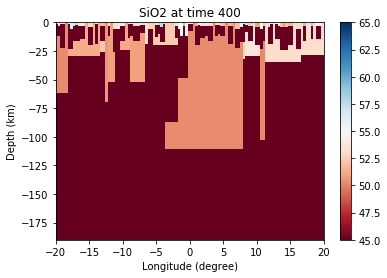

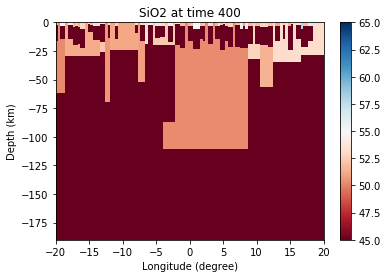

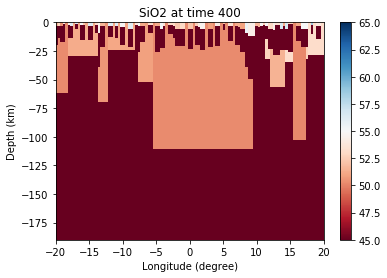

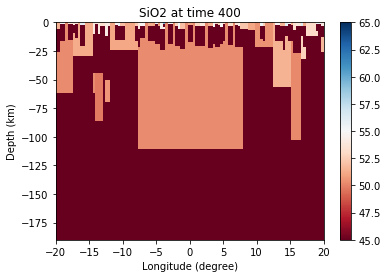

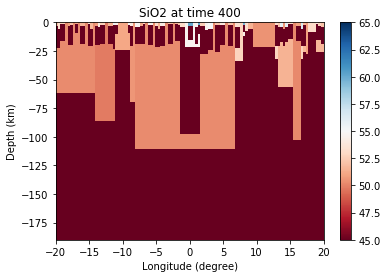

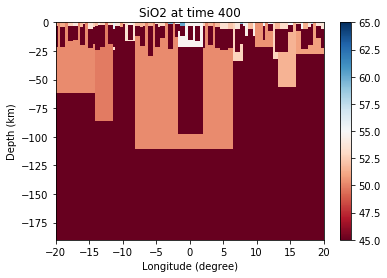

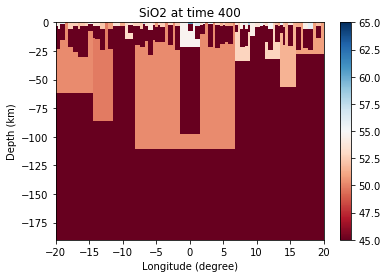

In [87]:
t=400
for cross_lat in range(1,19):
    state_file = './impact_states/march2022_5/0/{}.pkl'.format(t)
    with open(state_file, 'rb') as fb:
        impact_states = pkl.load(fb)
    I.grid_cell_state = impact_states
    
    n_vertical = 190

    cross_at_time = plot_cross_section(I, save_figure=False, plot_figure=True, fig_path='./', 
                       n_cross_vertical_discretizations=n_vertical, cross_lat=cross_lat, cross_time=t)